In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#functions 

#Kmeans function
def kmeans(data, clusters_num):
  #scale data
  scaler = StandardScaler()
  data = scaler.fit_transform(data)
  #apply method
  km = KMeans(n_clusters = clusters_num)
  km.fit(data)
  
  pred = km.predict(data)
  centroids = km.cluster_centers_
  labels = km.labels_
  
  #plotting
  sns.scatterplot(data[:,0], data[:,1], hue=pred)
  sns.scatterplot(centroids[:,0], centroids[:,1], color='y', s=50)
  plt.title('KMeans')
  plt.show()
  
  print(labels)
  print(silhouette_score(data,labels))

In [3]:
#Hierarchical function
def hierar(data, clusters_num):
  #scale data
  scaler = StandardScaler()
  data = scaler.fit_transform(data)
  #apply method
  ac = AgglomerativeClustering(n_clusters = clusters_num)
  ac.fit(data)
  
  pred = ac.fit_predict(data)
  labels = ac.labels_
  
  #plotting
  sns.scatterplot(data[:,0], data[:,1], hue=pred, palette='Spectral')
  plt.title('Hierarchical')
  plt.show()
  
  print(labels)
  print(silhouette_score(data,labels))

In [4]:
#DBSCAN function
def dbscan(data, e, min_s):
  #scale data
  scaler = StandardScaler()
  data = scaler.fit_transform(data)
  #apply method
  db = DBSCAN(eps=e, min_samples=min_s)
  db.fit(data)
  
  pred = db.fit_predict(data)
  labels = db.labels_
  
  #plotting
  sns.scatterplot(data[:,0], data[:,1], hue=pred, palette='magma')
  plt.title('DBSCAN')
  plt.show()
  
  print(labels)
  print(silhouette_score(data,labels))

In [5]:
#Gaussian mixture
def gauss(data, comp_num):
  #scale data
  scaler = StandardScaler()
  data = scaler.fit_transform(data)
  #apply method
  gm = GaussianMixture(n_components=comp_num)
  gm.fit(data)
  
  pred = gm.predict(data)
  
  #plotting
  sns.scatterplot(data[:,0], data[:,1], hue=pred, palette='magma')
  plt.title('Gaussian Mixture')
  plt.show()
  
  print(pred)
  print(silhouette_score(data,pred))

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

In [6]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

d1.head()

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


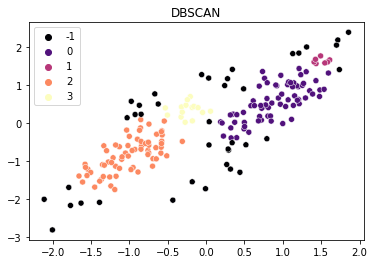

[-1  0  0  0  0  0  1  0 -1  0  1 -1 -1  0  0  0  0  2 -1  1  0 -1  0  0
 -1  0  0 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0 -1  0  0  1
  0  0  0 -1 -1  0  0  0  0  0 -1  0  0  0  0  1  0 -1  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  1  0  0  0 -1  0  0  0  0  0  1  0  0 -1 -1  0
  0 -1 -1  0 -1  2  3 -1  2  2  2  2  2  2  2 -1  2  2  2  2  2  3  2  2
  2  2  2  2 -1  2  2  2  2  3  2  3  2  2  2  2  3  2  2  2  2  3  3  3
  2 -1 -1  2  2  2  2  2  2  2  3  2  2  2  2  2  3  3  2 -1  2  3 -1  2
 -1  2 -1  2  2  2  2  3  2  2  3 -1 -1 -1  2 -1  2  2 -1  2 -1  2  2  2
  2 -1  2  2  2  3  2 -1]
0.18268247345993388


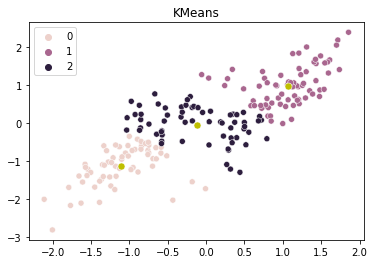

[1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 0 0 1 1 2 1 1 1 2 1 2 1 2 1 1 1 2 1 2 2
 2 0 1 1 1 1 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 0 1 2 1 1 1 2 1 1 1 1 1 2 1 1 2
 2 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 0 2 2 1 0 0 0 0 0 0 0
 1 0 0 2 0 0 2 0 0 2 0 0 0 2 0 2 0 0 2 0 2 0 0 0 0 2 0 2 0 0 2 2 2 0 1 2 0
 2 0 0 0 0 2 2 0 0 0 0 0 2 2 2 0 0 2 2 0 0 0 2 0 2 2 0 2 2 0 2 2 2 0 0 2 0
 2 1 0 0 2 0 2 0 1 0 0 0 2 0 0]
0.43992489383941363


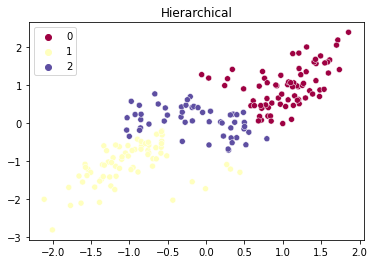

[0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 2 0 0 0 2 0 1 2
 2 1 0 0 0 0 2 2 0 2 0 2 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 2 0 0 2
 2 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 1 2 2 0 1 1 1 1 1 1 1
 0 1 1 2 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 2 1 1 1 1 2 1 1 1 1 2 2 2 1 0 2 1
 2 1 1 1 1 1 2 1 1 2 1 1 2 2 1 1 1 2 2 1 1 1 2 1 2 2 1 2 1 1 2 2 2 1 1 2 1
 1 0 1 1 2 1 1 1 0 1 1 1 2 1 1]
0.4156770762598497


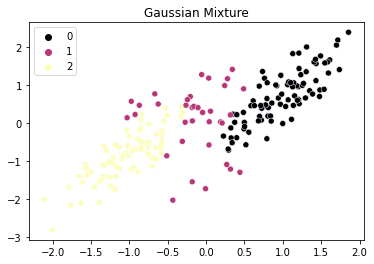

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 2 2 2 1 2 2 2 2 2 2 2
 1 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 1 1 1
 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 1 2 2 1 2 1 2 2 1 1 1 2 2 2 2
 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2]
0.3306975860818548


In [7]:
# dbscan and plot
#dbscan
dbscan(d1,0.3,10)
#kmeans
kmeans(d1,3)
#hierarchical
hierar(d1, 3)
#gaussian mixture
gauss(d1, 3)

In [ ]:
# grab only clustered data points


In [ ]:
# overall 


## Dataset 2

In [ ]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

d2.head()

,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589


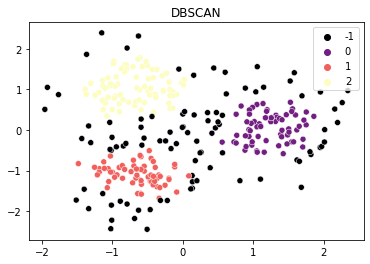

[-1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0 -1 -1 -1 -1 -1
  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0 -1  0  0 -1  0 -1  0  0
 -1  0  0  0  0  0 -1  0 -1 -1 -1 -1  0  0  0 -1 -1  0 -1 -1  0  0 -1  0
  0  0  0  0  0 -1 -1  0  0 -1  0  0  0 -1  0  0  0 -1  0  0  0  0  0 -1
 -1  0  0 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1 -1  1  1 -1 -1  1  1
  1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1 -1  1  1 -1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1
  1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1
  1  1  1  1  1 -1  1 -1  2 -1  2  2  2  2  2  2 -1 -1  2  2  2  2  2  2
  2  2  2  2  2 -1  2  2  2  2  2  2 -1  2  2  2  2  2  2  2  2  2  2 -1
 -1  2 -1  2 -1 -1  2  2  2 -1  2  2  2  2 -1  2  2  2 -1  2 -1  2  2 -1
  2  2  2  2  2  2  2  2  2 -1  2 -1  2  2  2 -1  2 -1  2 -1  2  2  2 -1
  2  2  2  2  2  2  2  2  2  2 -1 -1]
0.3170351723445121


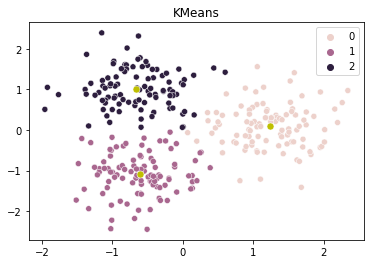

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
0.558315766313531


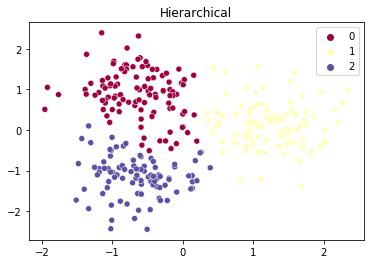

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 1 0
 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
0.5331004784160975


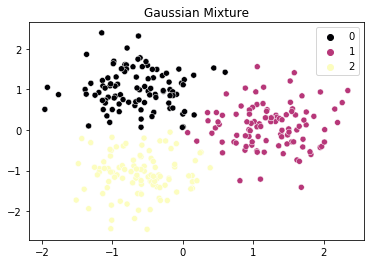

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
0.558315766313531


In [ ]:
#dbscan
dbscan(d2,0.3,10)
#kmeans
kmeans(d2,3)
#hierarchical
hierar(d2, 3)
#gaussian mixture
gauss(d2, 3)

In [ ]:
# grab only clustered data points

# overall 


## Dataset 3

In [ ]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

d3.head()

,x,y
0,1.332228,0.178299
1,1.256056,0.146765
2,1.477661,0.155054
3,1.384840,0.022054
4,1.526956,0.267920


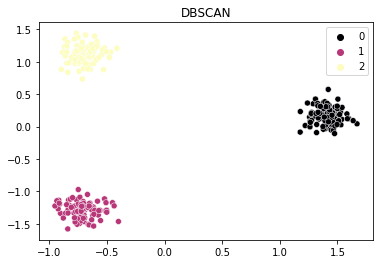

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
0.913619050733588


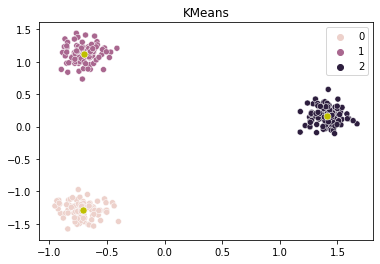

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
0.913619050733588


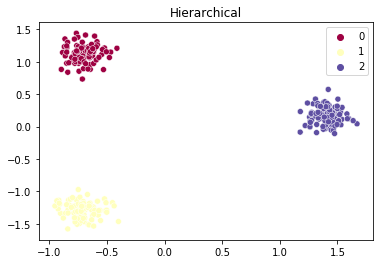

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
0.913619050733588


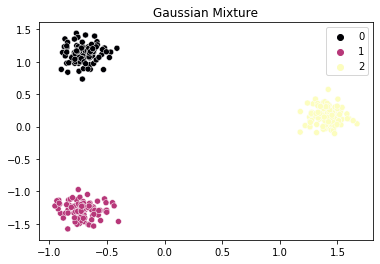

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
0.913619050733588


In [ ]:
#dbscan
dbscan(d3,0.3,10)
#kmeans
kmeans(d3,3)
#hierarchical
hierar(d3, 3)
#gaussian mixture
gauss(d3, 3)

In [ ]:
# grab only clustered data points

# overall 


## Dataset 4

In [ ]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")
d4.head()

,x,y
0,-0.006848,0.395527
1,0.314820,-0.289261
2,0.171705,1.078077
3,-1.203661,1.325926
4,-0.179379,-0.036615


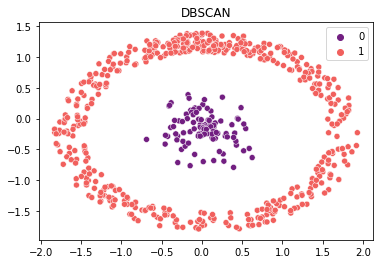

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

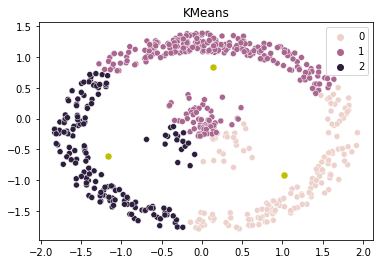

[1 0 1 1 1 1 1 0 1 2 2 2 0 0 1 0 1 1 2 2 0 2 0 1 0 1 2 0 1 1 1 1 1 1 1 1 1
 1 1 2 0 0 1 1 0 1 1 2 1 2 2 2 1 0 1 1 1 2 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 2 1 1 0 0 2 1 0 1 2 1 0 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1 1
 1 2 2 2 0 1 1 0 0 1 1 0 1 2 1 1 1 1 2 0 1 2 0 1 1 2 1 1 1 1 1 2 0 0 2 2 1
 1 1 0 1 2 1 2 0 0 0 1 2 2 2 1 1 0 1 1 2 0 1 0 2 2 2 2 0 0 0 1 0 2 1 0 0 1
 2 1 2 0 1 2 1 2 2 1 1 2 2 0 2 1 1 0 2 1 1 0 1 2 2 0 0 2 2 1 1 0 2 1 1 2 2
 1 0 1 1 0 0 1 1 1 2 1 2 1 1 2 2 0 1 1 0 1 2 1 1 1 0 1 0 2 2 1 2 2 1 1 1 0
 2 1 1 0 0 1 2 1 1 0 0 2 0 1 1 0 0 1 0 2 0 1 0 2 1 1 2 0 1 0 2 2 0 0 1 0 0
 2 2 0 0 2 1 2 2 0 2 2 0 1 2 2 2 1 1 2 1 2 2 1 1 0 1 0 1 0 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 0 1 1 2 0 1 2 1 2 1 1 1 0 1 2 0 2 2 1 2 1 1 1 2 0 1 2 1 2 1
 0 1 1 0 2 0 1 1 2 1 0 1 1 1 0 1 1 0 2 0 1 2 0 1 2 2 0 2 1 2 2 1 1 1 2 1 1
 1 0 2 0 1 1 0 2 0 1 2 1 1 0 2 1 1 1 1 1 1 2 0 1 1 2 2 2 1 1 1 0 1 2 1 1 1
 2 0 1 2 0 0 0 2 1 1 2 2 1 0 1 1 1 2 2 1 2 0 0 2 0 1 1 1 0 0 1 1 1 1 2 1 1
 0 2 1 0 1 2 1 0 2 0 2 1 

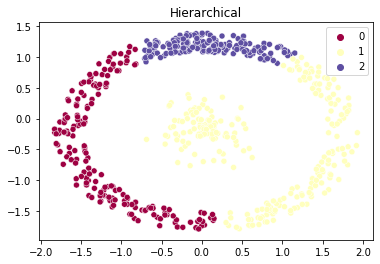

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0 2 2 1 0 0 1 2
 2 0 0 0 1 2 2 1 1 2 1 1 2 0 2 2 2 1 0 1 0 0 1 2 2 0 2 2 0 1 2 0 1 1 0 0 1
 2 2 1 2 0 2 0 1 1 1 2 0 0 0 2 2 0 2 2 0 0 2 1 0 0 0 0 1 0 1 1 1 0 2 1 1 2
 0 2 0 1 2 0 0 0 0 2 2 0 0 1 0 2 1 1 0 1 2 1 2 0 0 1 0 0 0 2 2 1 0 2 0 0 0
 2 1 1 2 1 1 2 2 2 0 2 0 2 2 0 0 1 2 2 0 2 0 2 2 0 1 2 1 0 0 2 0 0 2 1 2 1
 0 2 0 1 0 2 0 0 1 1 0 0 1 1 2 1 1 0 1 0 1 1 1 0 2 2 0 1 2 1 0 0 1 0 1 1 1
 0 0 1 1 0 2 0 0 1 0 0 1 2 0 0 0 2 1 0 2 0 0 2 2 1 2 1 0 1 1 0 0 2 1 2 0 0
 2 0 1 0 0 2 2 1 2 2 0 1 2 0 2 0 2 2 1 1 2 0 1 0 0 2 0 2 1 2 0 1 2 0 2 0 2
 0 2 2 1 0 1 2 2 0 2 1 2 2 2 1 2 2 1 0 0 0 0 1 2 0 0 1 0 2 0 0 2 0 2 0 2 1
 2 1 0 1 2 2 1 0 1 2 0 2 2 1 0 1 2 2 2 2 0 0 1 2 2 0 0 0 2 1 2 1 0 0 2 2 0
 0 1 2 0 1 0 1 0 1 2 0 0 2 0 1 1 2 0 0 2 0 1 1 0 1 0 2 1 1 1 2 2 2 2 0 1 2
 1 0 2 1 0 0 2 1 0 1 0 2 

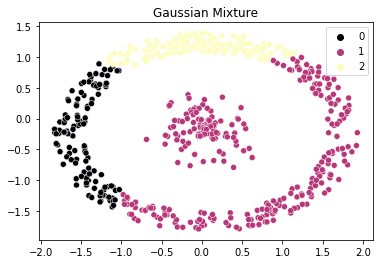

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0 2 2 1 0 0 1 2
 2 0 0 0 1 2 2 1 1 2 1 1 2 0 2 2 2 1 0 1 2 0 1 2 2 0 2 2 0 1 2 0 1 1 0 0 1
 2 2 1 2 0 2 0 1 1 1 2 0 0 0 2 2 1 2 2 1 1 2 1 0 0 0 0 1 1 1 1 1 0 2 1 1 2
 0 2 0 1 2 0 2 1 0 2 2 0 0 1 0 2 1 1 0 1 2 1 2 0 0 1 1 1 0 2 2 1 1 2 0 0 1
 2 1 1 2 1 1 2 2 2 0 2 1 2 2 0 0 1 2 2 1 2 1 2 2 2 1 2 1 1 1 2 0 0 2 1 2 1
 0 2 2 1 1 2 0 2 1 1 1 0 1 1 2 1 1 2 1 0 1 1 1 0 2 2 1 1 2 1 0 0 1 1 1 1 1
 0 0 1 1 0 2 0 0 1 1 1 1 2 0 1 0 2 1 0 2 0 0 2 2 1 2 1 2 1 1 0 1 2 1 2 0 0
 2 0 1 0 1 2 2 1 2 2 0 1 2 1 2 1 2 2 1 1 2 0 1 0 0 1 1 2 1 2 1 1 2 1 2 0 2
 1 2 2 1 1 1 2 2 1 2 1 2 2 2 1 2 2 1 0 1 2 0 1 2 0 0 1 0 2 0 0 2 0 2 1 2 1
 2 1 0 1 2 2 1 1 1 2 0 2 2 1 0 1 2 2 2 2 0 0 1 2 2 1 0 0 2 1 2 1 2 0 2 2 0
 1 1 2 0 1 1 1 1 1 2 0 1 2 1 1 1 2 0 0 2 1 1 1 0 1 2 2 1 1 1 2 2 2 2 0 1 2
 1 0 1 1 2 0 2 1 0 1 0 2 

In [ ]:
#dbscan
dbscan(d4,0.3,10)
#kmeans
kmeans(d4,3)
#hierarchical
hierar(d4, 3)
#gaussian mixture
gauss(d4, 3)

In [ ]:
# grab only clustered data points

# overall 


### Compare

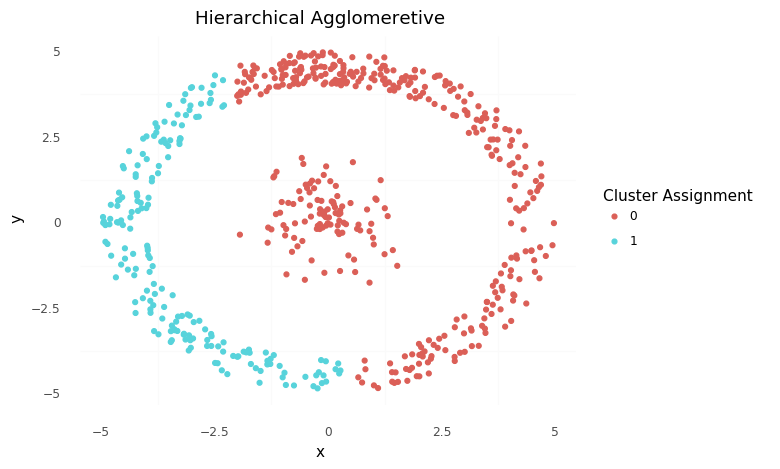

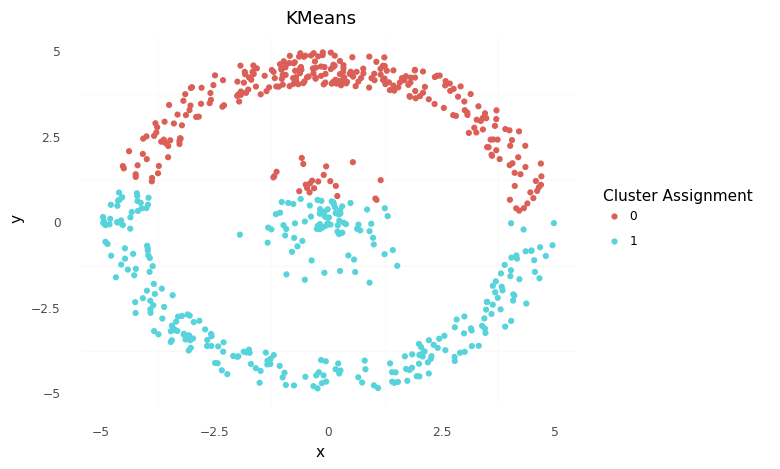

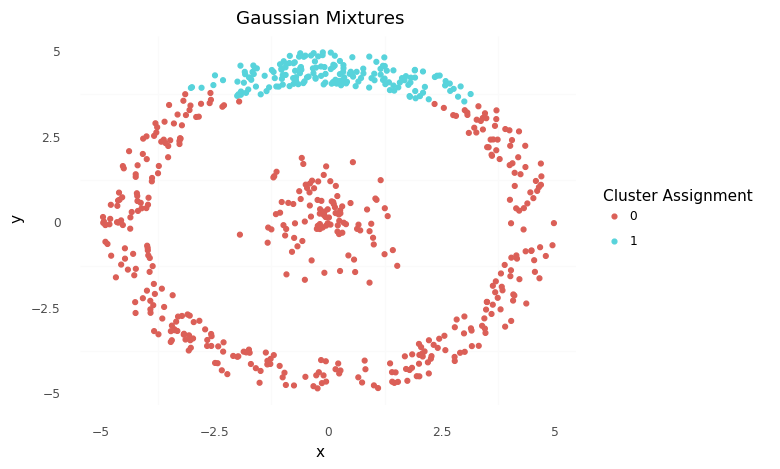

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

## Dataset 5

In [ ]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")


In [ ]:
d5.head()

,x,y
0,2.852449,-0.324568
1,2.346342,-0.729224
2,2.229033,-0.599340
3,2.458669,-0.385467
4,2.844177,-0.196813


In [ ]:
db5 = DBSCAN(eps = 0.5, min_samples = 15).fit(d5)

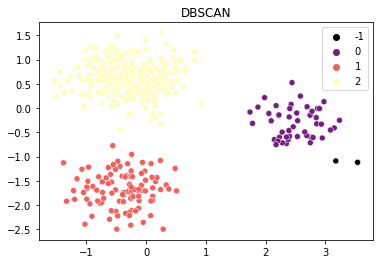

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2

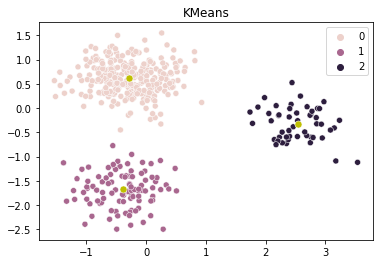

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
0.7043537508086658


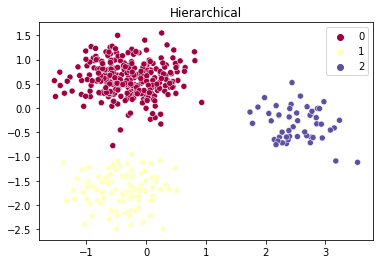

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
0.7031189213721805


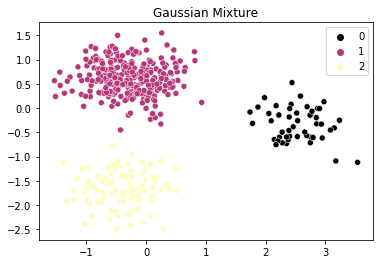

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
0.7043537508086658


In [ ]:
#dbscan
dbscan(d5,0.5,15)
#kmeans
kmeans(d5,3)
#hierarchical
hierar(d5, 3)
#gaussian mixture
gauss(d5, 3)

In [ ]:
# grab only clustered data points

# overall 


# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

In [ ]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")
d6.head()

,x,y
0,0.712520,0.653491
1,0.910914,0.068242
2,0.750752,0.526512
3,0.666605,0.584747
4,0.403062,0.956459


In [ ]:
distortion = []
ks = range(1,10)
for i in ks:
  kmean = KMeans(i)
  kmean.fit(d6)
  distortion.append(kmean.inertia_)

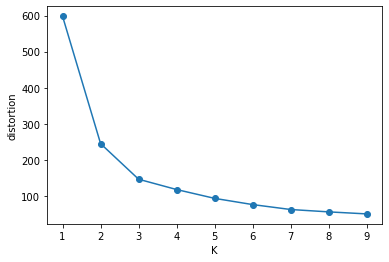

In [ ]:
plt.plot(ks,distortion, marker='o')
plt.xlabel('K')
plt.ylabel('distortion')
plt.show()

In [ ]:
hac = AgglomerativeClustering(3)
km = KMeans(3)
gm = GaussianMixture(3)
db = DBSCAN(eps=0.5, min_samples=10)

hac.fit(d6)
km.fit(d6)
gm.fit(d6)
db.fit(d6)

d6["hac"] = hac.labels_
d6["km"] = km.labels_
d6["gm"] = gm.predict(d6)
d6["db"] = db.labels_

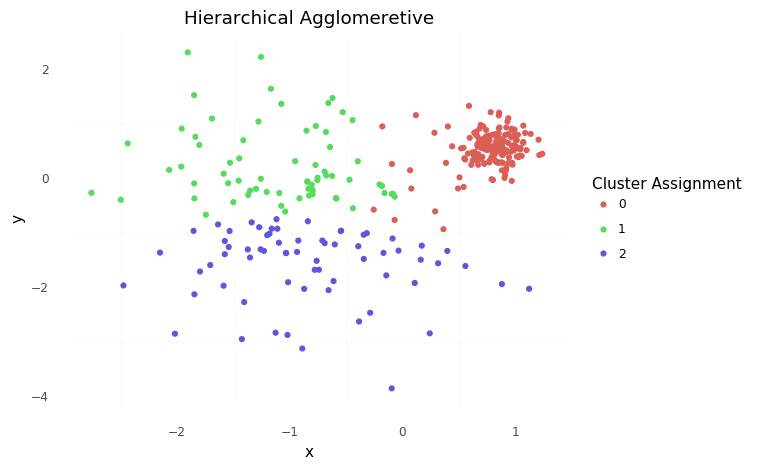

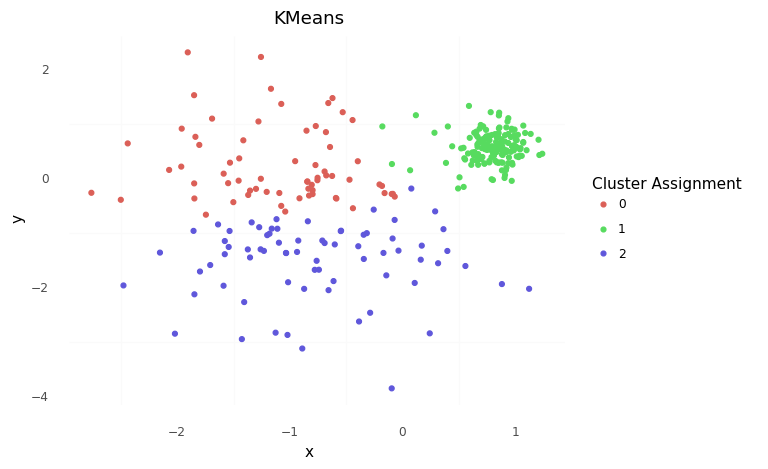

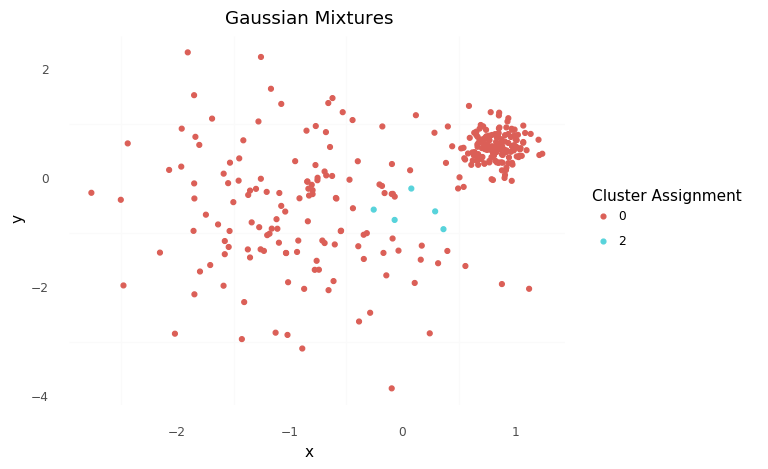

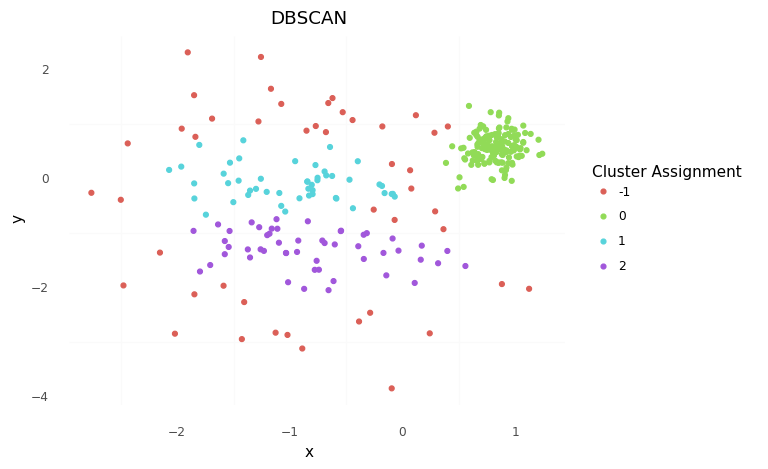

In [ ]:
# sort the distances
print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))


print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(db)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "DBSCAN"))

In [ ]:
print("silhouette score for hierarchical clustering: %0.4f" % silhouette_score(d6,d6["hac"] ))
print("silhouette score for kmeans clustering: %0.4f" % silhouette_score(d6,d6["km"] ))
print("silhouette score for gaussian clustering: %0.4f" % silhouette_score(d6,d6["gm"] ))
print("silhouette score for DBSCAN clustering: %0.4f" % silhouette_score(d6,d6["db"] ))

silhouette score for hierarchical clustering: 0.6436
silhouette score for kmeans clustering: 0.6362
silhouette score for gaussian clustering: 0.3178
silhouette score for DBSCAN clustering: 0.6578
